# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [49]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head(5) #inspect data


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [50]:
#inspect data
df.info() #no null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


<b> <li>  1) Is the distribution of body temperatures normal? </b>  
<span style='color:blue'> <b> ans </b>: Both descriptive and inferential statistical tests show that the distribution is normal. </span>

(a) Descriptive approach - To determine if the distribution is normal via visualization by:
>    
-Generating statistical plots (histograms, boxplots, and ecdf) of the actual data and of the ideal normal distribution of the data mean and standard deviation.  
>
-Subsequently inspecting if the two plots sufficiently overlap.

mean: 98.24923076923078 ; std. dev.: 0.7331831580389454


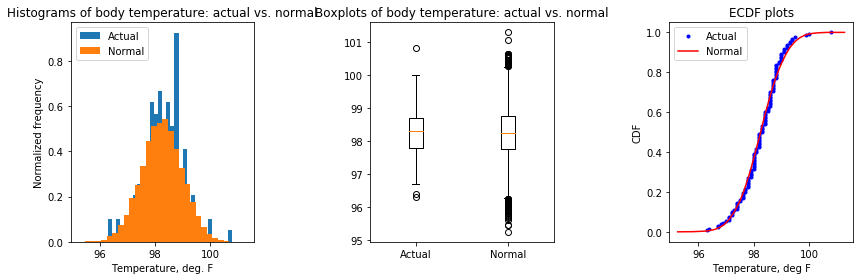

In [51]:
# Your work here.

import matplotlib.pyplot as plt

#Utilize hackers statistics to plot the ideal normal distribution
#first, determine the mean and standard deviation
print('mean:', df['temperature'].mean(),';', 'std. dev.:', df['temperature'].std())

import numpy as np
body_temp_normal=np.random.normal(df['temperature'].mean(), df['temperature'].std(), 10000) #simulate a normal distribution

#Define a function
#Code is taken from: Statistical thinking in python by Justin Bois (Datacamp)-Springboard Module 8.1 (Part 1)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y


#histograms
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
df['temperature'].plot.hist(bins=30, normed=True, label='Actual') #actual
plt.hist(body_temp_normal, bins=30, normed=True, label='Normal') #normal distribution

plt.legend()
plt.xlabel('Temperature, deg. F')
plt.ylabel('Normalized frequency')
plt.title('Histograms of body temperature: actual vs. normal')

#boxplots
plt.subplot(1,3,2)
plt.boxplot([df['temperature'], body_temp_normal]) 
plt.xticks([1, 2], ['Actual', 'Normal']) #label boxplots accordingly
plt.title('Boxplots of body temperature: actual vs. normal')

#ECDF
plt.subplot(1,3,3)
ecdf_actual_x,ecdf_actual_y=ecdf(df['temperature'])
ecdf_normal_x,ecdf_normal_y=ecdf(body_temp_normal)

plt.plot(ecdf_actual_x,ecdf_actual_y,'b.', label='Actual') #actual
plt.plot(ecdf_normal_x,ecdf_normal_y,'r-', label='Normal') #normal

plt.legend()
plt.title('ECDF plots')
plt.xlabel('Temperature, deg F')
plt.ylabel('CDF')


plt.tight_layout()
plt.show()


<span style='color:blue'> <b> Conclusion </b>: Based on the above plots, it is seen that the two plots are identical. The histograms overlap. Nevertheless, the histogram shows outliers between 98 and 100 deg. F, but, as seen from the corresponding boxplots, the outlier is within the tail of the normal distribution. Finally, the ecdf plots show a significant overlapping of most of the data points. </span>

(b) Inferential approach - To determine if the distribution is normal via a chi-square test for normality:


In [52]:
import scipy.stats as stats

z,pval=stats.normaltest(df['temperature'])

if pval > 0.05:
    print('p-value=%.3f' %(pval))
    print('Fail to reject H0: Distribution is normal.')
else: 
    print('p-value=%.3f' %(pval))
    print('Reject H0: Distribution is not normal.')

p-value=0.259
Fail to reject H0: Distribution is normal.


<span style='color:blue'> <b> Conclusion </b>: At p-value=0.05, the chi-square test for normality fails to reject H0 (i.e., the distribution is normal). </span>

<b> 2) Is the sample size large? </b>

In [53]:
print('The sample size is:', len(df['temperature']))

The sample size is: 130


<span style='color:blue'> <b> ans: </b> Since the sample size is greater than 30, it is generally considered large. </span>

Are the observations independent?   
<span style='color:blue'> <b> ans: </b> Since each temperature is obtained from a distinct individual, each observation is considered independent. </span>

<b> 3) Is the true population mean really 98.6 degrees F? </b>
Perform a confidence hypothesis test.

<span style='color:blue'> <b> ans: </b> Both t- and z-statistical tests show that the true population mean is not 98.6 deg. F. </span>

Would you use a one-sample or two-sample test? Why?

<span style='color:blue'> <b> ans: </b> I will use a one-sample test because this scenario involves a single-sample hypothesis testing of its mean against the population mean. </span>

<b> In this situation, is it appropriate to use the t or z statistic? </b>   
<span style='color:blue'> 
<b> ans: </b> It is appropriate to use the t-statistic because:* </span> 
> <span style='color:blue'> 
> -Population standard deviation ($\sigma$) is unknown    
> -The population is truly normally distributed (see #1 above)  
> </span>

*ref.: R.W. Weiers, "Introduction to Business Statistics", Brooks/Cole Publishing Company, 3rd Ed., 1998., pg. 328.

(a) t-statistic:  
State the null and alternative hypothesis:
> H0: The population mean is equal to 98.6 def. F  
> Ha: The population mean is not equal to 98.6 def. F 
 

In [54]:
#Using scipy function to carry out a one-sample t-test:
stats.ttest_1samp(df['temperature'],98.6) 

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

<span style='color:blue'> <b> ans: </b> The p value is 2.41e-7, which is much less than 0.025 for a two-tail test at alpha=0.05. Therefore, we reject H0. That is, the population mean is not equal to 98.6 deg. F. </span>

In [55]:
#We may verify the above calculation by manually calculating t0: 
t0=(df['temperature'].mean()-98.6)/(df['temperature'].std()/np.sqrt(len(df['temperature'])))
print('t-value: %.2f' %(t0))


t-value: -5.45


<b> validated: </b> The same t-value of -5.45 is obtained.

<b> Now try using the other test. How is the result be different? Why? </b>

In [56]:
#carrying out the same one sample hypothesis test, but using a z-test:
#NOTE: In carrying out a z-statistic, I calculate the mean using the population mean formula (i.e., df=n). This may be a reasonable estimate because n>30. 
z0=(df['temperature'].mean()-98.6)/(df['temperature'].std()/np.sqrt(len(df['temperature'])))
#calculate the p-value
p_value=stats.norm.cdf(z0)*2 #multiply the number by two because it is a two-tail test

if p_value < 0.05:
    print('At a p_value of %.2f, we reject H0 at alpha 0.05. That is, the mean body temperature is different from 98.6 deg. F' %(p_value_samples))
else:
    print('At a p_value of %.2f, we fail to reject H0 at alpha 0.05. That is, the mean body temperature is equal to 98.6 deg. F' %(p_value_samples))

At a p_value of 0.11, we reject H0 at alpha 0.05. That is, the mean body temperature is different from 98.6 deg. F


<span style='color:blue'> <b> Conclusion: </b> Since the p-value is less than 0.05, we reject H0. That is, the population mean is not equal to 98.6 deg. F. Hence, the conclusion is the same whether a t-test or a z-test is used. In both cases, very small p-values are obtained. </span>  

<span style='color:blue'> Since n is much greater than 30, the sample standard deviation is almost comparable with the population standard deviation. Therefore, both tests yield the same conclusion. </span>

<b> 4) Draw a small sample of size 10 from the data and repeat both tests. Which one is the correct one to use? </b>

<span style='color:blue'> <b> ans </b>: Assuming that the population is normally distributed, for n >= 30, t-statistic is more appropriate than z-statistic. However, plotting the sample data shows that the distribution of the sample data is not normally distributed (see below). Therefore, distribution-free test (e.g., bootstrap resampling) is actually more appropriate. </span> 

What do you notice? What does this tell you about the difference in application of the t and z statistic?  

<span style='color:blue'>  <b> ans </b>: The population mean and the sample mean are equal (i.e., both yield the same value of 98.2 deg. F). </span> 

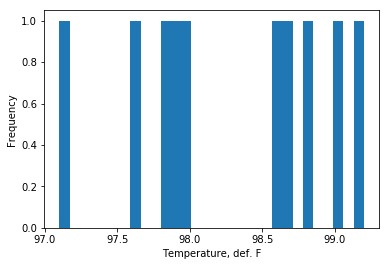

In [57]:
#randomly select 10 numbers.
np.random.seed(12)
sample_temperature=np.random.choice(df['temperature'],size=10, replace=True) #select ten samples at random with replacement.

plt.hist(sample_temperature, bins=30) #check distribution of sample data 
plt.xlabel('Temperature, def. F')
plt.ylabel('Frequency')
plt.show()

(a) t-statistic

In [58]:
print(sample_temperature) #check

#Using scipy function to carry out a one-sample t-test:
stats.ttest_1samp(sample_temperature,98.6) 

[ 98.8  99.2  98.   98.6  97.1  98.7  99.   97.9  97.8  97.6]


Ttest_1sampResult(statistic=-1.5237984185806361, pvalue=0.16189396419359592)

<span style='color:blue'>  <b> conclusion: </b> Since p-value is greater than 0.05, we fail to reject H0. That is, the mean is equal to 98.6 deg. F. </span>

- Here, we see that having a small sample size could lead to a different conclusion. Therefore, it is appealing to carry out bootstrap statistics to see if performing the t-test using a small sample size multiple times will lead to the same result every time.

(b) z-statistic

In [59]:
z0_samples=(sample_temperature.mean()-98.6)/(sample_temperature.std()/np.sqrt(len(sample_temperature)))

p_value_samples=stats.norm.cdf(z0_samples)*2 #multiply the number by two because it is a two-tail test

if p_value_samples < 0.05:
    print('At a p_value of %.2f, we reject H0 at alpha 0.05. That is, the mean body temperature is different from 98.6 deg. F' %(p_value_samples))
else:
    print('At a p_value of %.2f, we fail to reject H0 at alpha 0.05. That is, the mean body temperature is equal to 98.6 deg. F' %(p_value_samples))

At a p_value of 0.11, we fail to reject H0 at alpha 0.05. That is, the mean body temperature is equal to 98.6 deg. F


<b> NOTE: </b> This conclusion is contrary to our previous analysis delineated above that involves n greater than 30.  Indeed, as mentioned above, the fact that the distribution of the sample data consisting of just ten values is not normally distributed it makes it necessary to perform bootstrap resampling to yield a more reliable result (see below).

Moreover, this contrary conclusion to the previous analysis is in fact coherent with that conceptulalized by Carl Wunderlich in his famous 1868 book. This implies that Carl may have used insufficient data to perform his analysis.

In [60]:
#Bootstrap functions taken from: Statistical thinking in python by Justin Bois (Datacamp)-Springboard Module 8.1 (Part 1)

def draw_bs_reps(data, func, size=1, n=10):
    """Draw bootstrap replicates m number of times, where m=size. Uses bootstrap replicate_1d() 
    function to generate the replicates, where n is the number of values selected from the given 
    array with  replacement"""
    #Return replicates.

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func,n)

    return bs_replicates

def bootstrap_replicate_1d(data, func, n):
    """Generate replicates by randomly selecting n numbers from the given array without eliminating the selected number. 
    Hence, repeated entries are possible."""
    
    return func(np.random.choice(data, n))


mean of means: 98.25 deg. F
mean std. deviation of the bootstrap samples: 0.24 deg. F


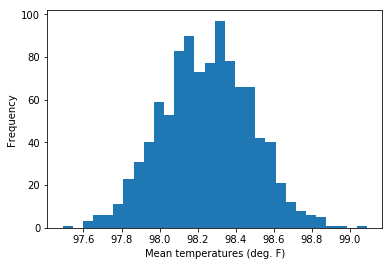

In [61]:
#Use bootstrap functions to calculate mean of n=10 taken at random with replacement one thousand times
bs_means=draw_bs_reps(df['temperature'], np.mean, 1000, 10)
#print(bs_means) #check

#calculate the mean of means
print('mean of means: %.2f deg. F' %(np.mean(bs_means)))
print('mean std. deviation of the bootstrap samples: %.2f deg. F' %(np.std(bs_means)))

#plot out the distribution
plt.hist(bs_means, bins=30)

plt.xlabel('Mean temperatures (deg. F)')
plt.ylabel('Frequency')
plt.show()


In [62]:
#Note that the above histogram shows an approximately normal distribution of the means.
#Using the boostrap mean of means and mean standard deviation, we perform a z-statistic.
#In this case, a t-statistic is more appropriate because the population standard deviation is unkown.

stats.ttest_1samp(bs_means,98.6) 


Ttest_1sampResult(statistic=-47.565958457268721, pvalue=6.4698259064092557e-259)

<span style='color:blue'> <b> ans: </b> The p value is 5.05e-262, which is much less than 0.025 for a two-tail test at alpha=0.05. Therefore, we reject H0. That is, the population mean is not equal to 98.6 deg. F. This is consistent with the previous conclusion that involved a large sample with n>30. </span>

<b> 5) At what temperature should we consider someone's temperature to be "abnormal"? </b>
Start by computing the margin of error and confidence interval. 
<span style='color:blue'>  <b> ans: </b> A person's body temperature is considered abnormal if it is below 98.12 deg. F or above 98.38 deg. F. </span>  

In [63]:
#Calculate a two-tail confidence interval with alpha=0.05
z_critical = stats.norm.ppf(q = 0.975)
print('z_critical: %.2f' %(z_critical)) #check

#calculate sample mean
sample_mean=df['temperature'].mean()
print('pop mean: %.2f' %(sample_mean)) #check

#calculate population standard deviation
pop_std = df['temperature'].std()
pop_std #check
print('pop std. dev.: %.2f' %(pop_std))

#calculate margin of error
margin_of_error = z_critical * (pop_std/np.sqrt(len(df['temperature'])))

#calculate confidence interval
confidence_interval = ('(%.2f, %.2f) deg. F' %(sample_mean - margin_of_error, sample_mean + margin_of_error))
print('\n')
print('The confidence interval at alpha=0.05 is:', confidence_interval)


z_critical: 1.96
pop mean: 98.25
pop std. dev.: 0.73


The confidence interval at alpha=0.05 is: (98.12, 98.38) deg. F


<span style='color:blue'>  <b> Conclusion: </b> Therefore, a person's body temperature is considered abnormal if it is below 98.12 deg. F or above 98.38 deg. F. </span>  

<b> 6) Is there a significant difference between males and females in normal temperature? </b>

<span style='color:blue'>  <b> ans: </b> Both the descriptive and inferential statistic approaches conclude that the population means are not equal between male and female. <span style='color:blue'>

What test did you use and why?   
> (a) Descriptive statistic: I use histogram, boxplot, and ecdf to visually see if the distribution of temperature of the two population overlap.  
> (b) Inferential statistic: I use independent t-test because the population means are unknown. The populations are approximately normally distributed (see below). Here, I assume that the population standard deviations are unequal.

*ref.: R.W. Weiers, "Introduction to Business Statistics", Brooks/Cole Publishing Company, 3rd Ed., 1998., pg. 377.

(a) Descriptive approach

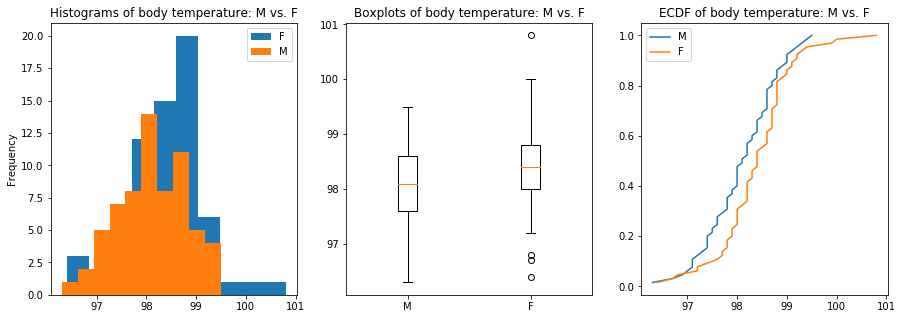

In [67]:
#Generate histograms for each male and female populations

#histograms
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df.groupby('gender')['temperature'].plot.hist()
plt.title('Histograms of body temperature: M vs. F')
plt.legend()

#boxplots
plt.subplot(1,3,2)
plt.boxplot([df['temperature'][df['gender']=='M'], df['temperature'][df['gender']=='F']]) 
plt.xticks([1, 2], ['M', 'F']) #label boxplots accordingly
plt.title('Boxplots of body temperature: M vs. F')

#ECDF
ecdf_male_x,ecdf_male_y=ecdf(df['temperature'][df['gender']=='M'])
ecdf_female_x,ecdf_female_y=ecdf(df['temperature'][df['gender']=='F'])

plt.subplot(1,3,3)
plt.plot(ecdf_male_x,ecdf_male_y, label='M')
plt.plot(ecdf_female_x,ecdf_female_y, label='F')        
plt.title('ECDF of body temperature: M vs. F')
plt.legend()

plt.show()


<span style='color:blue'>  <b> Conclusion </b>: Based on a descriptive statistics, the histograms show that much of the areas don't overlap. The boxplots show that the medians (i.e., the values at a 50th percentile) don't coincide. Finally, the ecdf plot show very little overlap. Therefore, it is concluded that the two distributions are visually different.Also, note that the distribution of female body temperature seems skewed. </span>

(b) Inferential approach using an independent t-tests to compare two populations with unequal variance.   
 
State the null and alternative hypothesis:
> H0: The population means are equal ($\mu_{1}$=$\mu_{2}$).  
> Ha: The population means are not equal ($\mu_{1}\neq\mu_{2}$). 
 
<span style='color:blue'>  <b> ans: </b> Reject H0 at alpha=0.05. The population means are not equal between male and female. <span style='color:blue'>

In [65]:
#using scipy
stats.ttest_ind(a= df['temperature'][df['gender']=='M'], b=df['temperature'][df['gender']=='F'], equal_var=False) # Assume samples have unequal variance

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

<span style='color:blue'>  <b> conclusion: </b> Reject H0 at alpha=0.05. That is, the population means are not equal between male and female. <span style='color:blue'> 

<b> Write a story with your conclusion in the context of the original problem. </b>

By leaving out the technical details that have already been delineated above, this analysis can be summarized into a short paragraph, which is as follows:

### <b> Title: Re-considering the generalized mean normal body temperature </b>

In contrary to the famous book that was first conceptualized in 1868 by Carl Wunderlic, statistical analysis concludes that mean normal body temperature is different from 98.6 deg. F. Moreover, the body temperatures are different between male and female. The incorrect conclusion made by carl is most likely due to the use of an insufficient sample size. 
